   # Learning Python

## Statsmodels

### Linear Regression Models

In [1]:
# Python Version
from platform import python_version
print(python_version())

3.8.5


In [9]:
import numpy as np
import pandas as pd
import statsmodels as st
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from pylab import *
%matplotlib inline

In [10]:
np.random.seed(9876789)

In [11]:
np.__version__

'1.19.2'

In [12]:
pd.__version__

'1.1.3'

In [13]:
st.__version__

'0.12.0'

In [17]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [19]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [23]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.661e+06
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          2.18e-242
Time:                        13:24:12   Log-Likelihood:                -139.13
No. Observations:                 100   AIC:                             284.3
Df Residuals:                      97   BIC:                             292.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8798      0.290      3.029      0.0

In [24]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.87981867 0.17519662 9.99066304]
R2:  0.9999895938898501


In [29]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     212.2
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           6.08e-27
Time:                        13:24:48   Log-Likelihood:                -37.425
No. Observations:                  50   AIC:                             82.85
Df Residuals:                      46   BIC:                             90.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5094      0.028     18.172      0.0

In [30]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.50937958  0.55068923 -0.01985684  5.01020195]
Standard errors:  [0.02803128 0.11019427 0.00246117 0.18175589]
Predicted values:  [ 4.51378104  5.01801314  5.47971668  5.86887956  6.16632093  6.36684246
  6.48008248  6.5289324   6.54577572  6.5671675   6.62782849  6.75494061
  6.96368101  7.25472852  7.61415215  8.01569985  8.42511171  8.80574873
  9.12461252  9.35776682  9.4942702   9.53797365  9.50688794  9.43022444
  9.34359581  9.28316494  9.27970345  9.35353608  9.5112013   9.74437713
 10.03124836 10.3400908  10.63448339 10.87929213 11.0464425  11.119532
 11.09652503 10.99008738 10.8255052  10.63653064 10.4598364  10.32899056
 10.2689414  10.29191849 10.3954234  10.56264019 10.76519821 10.96783333
 11.13418174 11.23275439]


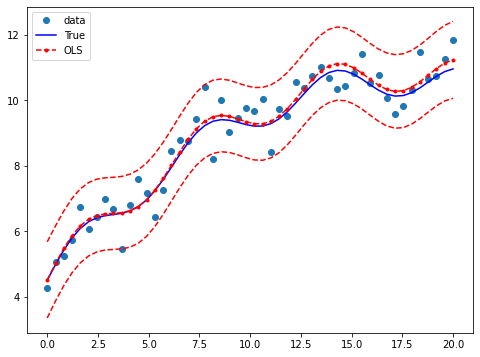

In [36]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')
plt.show()

### Time-Series Analysis

In [38]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [40]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [43]:
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [51]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

/home/jpaulorc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [57]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -231.779
Method:                       css-mle   S.D. of innovations              0.607
Date:                Sat, 27 Feb 2021   AIC                            473.557
Time:                        14:30:06   BIC                            491.165
Sample:                    01-31-1980   HQIC                           480.644
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.0107      0.068      0.157      0.875      -0.123       0.144
ar.L2.y       -0.5499      0.058     -9.422      0.000      -0.664      -0.436
ma.L1.y        1.2914      0.065     19.845      0.0